### Experiment 5 Classifying movie reviews - a binary classification example

.<center>
**Course Name:** Deep learning with python<center>
**Experiment Name:** A Classifying movie reviews - a binary classification example<center>
**Major:** Computer Science and Technology<center>
**Class:** <center>
**Student Name:** Reeshad Khan<center>
**Student ID:** 2019124921<center>
**Lab:** Computer Room <center> 
**Date:** 2020/05/04 <center>

### Task
understand the IMDB database and construct a binary classification network.<br>
1. Try using one or three hidden layers, and see how doing so affects validationand test accuracy.<br>
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.<br>
3. Try using the mse loss function instead of binary_crossentropy.<br>
4. Try using the tanh activation (an activation that was popular in the early days of neural networks)
instead of relu.</ol>

### 1 The IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


### 2 Encoding the sequences into a binary matrix

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
train_data.shape

(25000,)

In [5]:
x_train.shape

(25000, 10000)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
y_train.shape

(25000,)

In [8]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### 3 Building a binary classification network

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 4 Training

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 75s 5ms/step - loss: 0.5227 - acc: 0.7861 - val_loss: 0.3958 - val_acc: 0.8661
Epoch 2/20
15000/15000 [==============================] - 9s 570us/step - loss: 0.3130 - acc: 0.9024 - val_loss: 0.3342 - val_acc: 0.8659
Epoch 3/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.2324 - acc: 0.9255 - val_loss: 0.2850 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.1808 - acc: 0.9451 - val_loss: 0.2778 - val_acc: 0.8884
Epoch 5/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1511 - acc: 0.9516 - val_loss: 0.2765 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1253 - acc: 0.9611 - val_loss: 0.2936 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1027 - acc: 0.9705 - val_loss: 0.3467 - 

### 5 Plot accuracy

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [14]:
history_dict['acc']

[0.78613335,
 0.9024,
 0.92546666,
 0.9450667,
 0.9516,
 0.96106666,
 0.9704667,
 0.97713333,
 0.9816,
 0.9852,
 0.98786664,
 0.99333334,
 0.9924667,
 0.99593335,
 0.99633336,
 0.9982,
 0.99693334,
 0.9998,
 0.998,
 0.99986666]

In [15]:
history_dict['val_acc']

[0.866100013256073,
 0.8658999800682068,
 0.888700008392334,
 0.8884000182151794,
 0.8891000151634216,
 0.885200023651123,
 0.8694000244140625,
 0.8762999773025513,
 0.8798999786376953,
 0.8715999722480774,
 0.8730000257492065,
 0.8784999847412109,
 0.8730000257492065,
 0.8725000023841858,
 0.8701000213623047,
 0.8695999979972839,
 0.8686000108718872,
 0.8662999868392944,
 0.8676000237464905,
 0.8666999936103821]

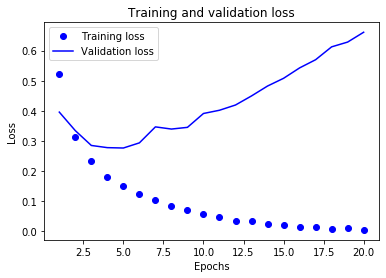

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

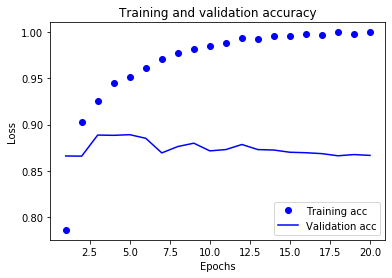

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 241us/step


### 6 Generate predictions on new data

In [20]:
pre = model.predict(x_test)

In [21]:
pre

array([[0.00717542],
       [0.99999976],
       [0.98967373],
       ...,
       [0.00222304],
       [0.02690777],
       [0.47853354]], dtype=float32)

In [25]:
persentage = pre*100

In [26]:
persentage.astype(int)

array([[ 0],
       [99],
       [98],
       ...,
       [ 0],
       [ 2],
       [47]])

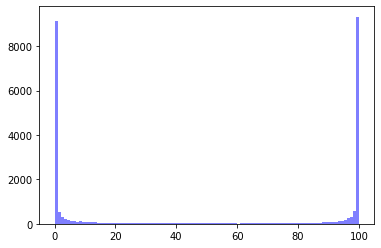

In [45]:
plt.clf()
plt.hist(persentage,100, color = 'blue', alpha = 0.5, histtype = "bar")
plt.show()

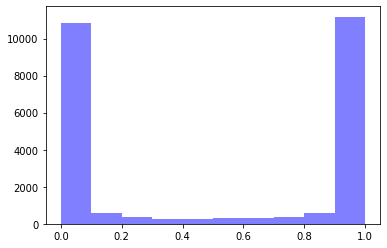

In [39]:
plt.clf()
plt.hist(pre,10, color = 'blue', alpha = 0.5, histtype = "bar")
plt.show()

## 7 Analysis and Conclusion